In [54]:
import albumentations as A

import albumentations as A

# Dönüşümleri bir araya getirin
transform = A.Compose([
    A.RandomResizedCrop(height=224, width=224, scale=(0.5, 1.0), p=1.0),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=False, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.GaussianBlur(p=0.5),
    A.MultiplicativeNoise(multiplier=(0.5, 1.5), p=0.5),
    A.Resize(height=224, width=224, p=1.0),
])


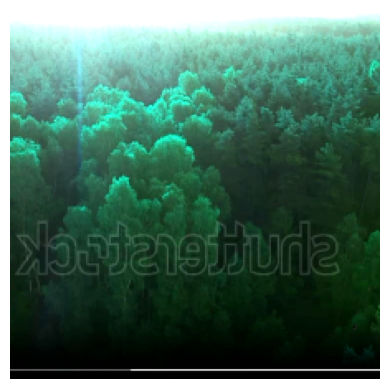

In [55]:
import cv2

def apply_augmentation(image):
    augmented = transform(image=image)
    augmented_image = augmented["image"]
    return augmented_image

# Örnek bir görüntü yükleyin
image = cv2.imread("frames/frame_vid0_0.jpg")

# Dönüşümü uygula
augmented_image = apply_augmentation(image)
output_path = os.path.join("aug_frames/","aug.jpg")
cv2.imwrite(output_path, augmented_image)
import matplotlib.pyplot as plt

# Artırılmış görüntüyü görüntüle
plt.imshow(augmented_image)
plt.axis('off')  # Eksenleri kapatmak için
plt.show()



In [56]:
import os
input_folder = "frames"
output_folder = "aug_frames"
augmentation_factor = 5  # Her bir görüntüyü kaç kez artırmak istediğinizi belirtin

# Çıkış klasörünü oluşturun (varsa silin)
if os.path.exists(output_folder):
    os.rmdir(output_folder)
os.makedirs(output_folder)

# Görüntü dosyalarını listeleyin
image_files = os.listdir(input_folder)

for image_file in image_files:
    # Görüntüyü yükleyin
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)

    # Dönüşümleri uygulayın ve kaydedin
    for i in range(augmentation_factor):
        augmented_image = apply_augmentation(image)
        output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_aug_{i}.jpg")
        cv2.imwrite(output_path, augmented_image)